# Diabetes Prediction

In [1]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input
from livelossplot import PlotLossesKerasTF

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#### Separate feature and outcome

In [6]:
x=df.drop(columns="Outcome")
y=df.Outcome

#### Split the data

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [8]:
print(x_train.shape)
print(x_test.shape)

(614, 8)
(154, 8)


#### Standardise the data

In [9]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
# st.fit(x_train)
# st.fit(x_test)
x_train_std=st.fit_transform(x_train)
x_test_std=st.fit_transform(x_test)

In [10]:
x_train_std

array([[ 0.90832902,  0.91569367,  0.44912368, ...,  0.37852648,
         0.67740401,  1.69955804],
       [ 0.03644676, -0.75182191, -0.47230103, ..., -0.50667229,
        -0.07049698, -0.96569189],
       [-1.12606292,  1.38763205,  1.06340683, ...,  2.54094063,
        -0.11855487, -0.88240283],
       ...,
       [ 0.03644676, -0.84620959, -0.21634972, ..., -0.94927168,
        -0.95656442, -1.04898095],
       [ 2.0708387 , -1.12937261,  0.24436264, ..., -0.26640405,
        -0.50001442,  0.11706589],
       [ 0.32707418,  0.47521786,  0.65388473, ..., -4.07275877,
         0.52121586,  2.94889395]])

#### Model Building

In [11]:
model=Sequential()
model.add(Input(shape=(8,),name="Input Layer"))

model.add(Dense(10,activation='relu',name="Hidden1"))
model.add(Dense(12,activation='relu',name="Hidden2"))

model.add(Dense(1,activation='sigmoid',name='OutputLayer'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 10)                90        
                                                                 
 Hidden2 (Dense)             (None, 12)                132       
                                                                 
 OutputLayer (Dense)         (None, 1)                 13        
                                                                 
Total params: 235
Trainable params: 235
Non-trainable params: 0
_________________________________________________________________


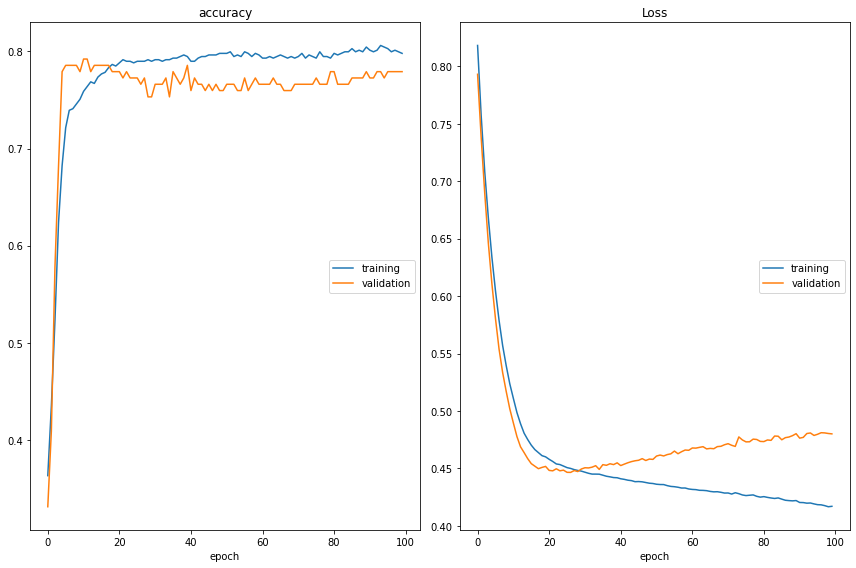

accuracy
	training         	 (min:    0.363, max:    0.806, cur:    0.798)
	validation       	 (min:    0.331, max:    0.792, cur:    0.779)
Loss
	training         	 (min:    0.417, max:    0.818, cur:    0.417)
	validation       	 (min:    0.447, max:    0.793, cur:    0.480)
20/20 [==============================] - 0s 23ms/step - loss: 0.4170 - accuracy: 0.7980 - val_loss: 0.4801 - val_accuracy: 0.7792


In [13]:
model.fit(x_train_std,y_train,epochs=100,batch_size=32, validation_data=(x_test_std,y_test),callbacks=[PlotLossesKerasTF()])

In [14]:
from sklearn.metrics import classification_report

In [15]:
t= model.predict(x_test_std)

In [16]:
t

array([[9.74575400e-01],
       [8.88932943e-02],
       [5.72734177e-02],
       [7.04624772e-01],
       [1.26506209e-01],
       [1.38253570e-02],
       [8.69351864e-01],
       [9.44236934e-01],
       [3.41742694e-01],
       [3.85298163e-01],
       [7.03106761e-01],
       [9.81887341e-01],
       [2.90975273e-01],
       [1.41966701e-01],
       [2.63533473e-01],
       [3.52645040e-01],
       [9.31859970e-01],
       [1.11225843e-02],
       [3.04417312e-01],
       [3.92597914e-01],
       [8.56615305e-01],
       [2.65705287e-01],
       [2.92048573e-01],
       [1.27320826e-01],
       [4.51907516e-03],
       [4.30745929e-01],
       [2.77940929e-02],
       [9.57452416e-01],
       [6.91362917e-02],
       [2.64778554e-01],
       [4.55150068e-01],
       [1.95555180e-01],
       [6.22552037e-02],
       [6.76218510e-01],
       [4.31241989e-02],
       [5.56527317e-01],
       [2.94324458e-01],
       [1.51876509e-02],
       [4.47578967e-01],
       [8.79633546e-01],


In [17]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [18]:
print(len(t))

154


In [20]:
t1 = []
for i in range(len(t)):
    if t[i] >= 0.5:
        t1.append(1)
    else:
        t1.append(0)

In [21]:
t1

[1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0]

In [ ]:
new_pred = pd.Series(t1)  
print(new_pred)

In [ ]:
y_test

In [ ]:
type(y_test)

In [ ]:
print(classification_report(y_test,new_pred))